In [77]:
from glob import glob
import os, sys
from functools import partial
import json

from pprint import pprint

import xarray as xr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))
import constants
sys.path.append(constants.MODULE_DIR)
import open_ds
import open_zecmip
import utils
import warnings
warnings.filterwarnings('ignore')
import signal_to_noise as sn
import plotting_functions
import xarray_extender as xe

import drift_functions
import sn_plotting

from importlib import reload
from typing import List, Any, Callable, Union, Tuple, Optional
from numpy.typing import ArrayLike
from matplotlib.axes import Axes

from listXarray import listXarray

In [78]:
notebook_number = 'draft_07_zec'

In [79]:
import listXarray
reload(listXarray)
from listXarray import listXarray
reload(open_zecmip)

<module 'open_zecmip' from '/home/563/ab2313/Documents/PhD/modules/open_zecmip.py'>

In [87]:
esmpi_raw_xrlist =  open_zecmip.extract_experiment_into_xrlist('esm-piControl', 'tas', logginglevel='INFO').to_dataarray('tas')

- ACCESS-ESM1-5
- r1i1p1f1 - /g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/esm-piControl/r1i1p1f1/Amon/tas/gn/v20191115/*.nc
- CanESM5
- r1i1p1f1 - /g/data/oi10/replicas/CMIP6/CMIP/CCCma/CanESM5/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190429/*.nc
- MIROC-ES2L
- r1i1p1f2 - /g/data/oi10/replicas/CMIP6/CMIP/MIROC/MIROC-ES2L/esm-piControl/r1i1p1f2/Amon/tas/gn/v20200428/*.nc
- UKESM1-0-LL
- r1i1p1f2 - /g/data/oi10/replicas/CMIP6/CMIP/MOHC/UKESM1-0-LL/esm-piControl/r1i1p1f2/Amon/tas/gn/v20190916/*.nc
- MPI-ESM1-2-LR
- r1i1p1f1 - /g/data/oi10/replicas/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190815/*.nc
- GISS-E2-1-G-CC
- r1i1p1f1 - /g/data/w40/ab2313/PhD/zecmip/original/esm_picontrol/GISS/*.nc
- CESM2
- r1i1p1f1 - /g/data/oi10/replicas/CMIP6/CMIP/NCAR/CESM2/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190723/*.nc
- NorESM2-LM
- r1i1p1f1 - /g/data/oi10/replicas/CMIP6/CMIP/NCC/NorESM2-LM/esm-piControl/r1i1p1f1/Amon/tas/gn/v20190920/*.nc
- GFDL-ESM4
- r1i1p1f1 - /g

In [89]:
pi_raw_xrlist =  open_zecmip.extract_experiment_into_xrlist('picontrol', 'tas').to_dataarray('tas')

In [94]:
pi_raw_xrlist.dim('ensemble')

ACCESS-ESM1-5 - ['r1i1p1f1']
CanESM5 - ['r1i1p1f1' 'r1i1p2f1']
MIROC-ES2L - ['r1i1p1f2']
UKESM1-0-LL - ['r1i1p1f2']
MPI-ESM1-2-LR - ['r1i1p1f1' 'r2i1p1f1']
GISS-E2-1-G-CC - ['r1i1p1f1']
CESM2 - ['r1i1p1f1']
NorESM2-LM - ['r1i1p1f1']
GFDL-ESM4 - ['r1i1p1f1']


In [95]:
esmpi_raw_xrlist.dim('ensemble')

ACCESS-ESM1-5 - ['r1i1p1f1']
CanESM5 - ['r1i1p1f1']
MIROC-ES2L - ['r1i1p1f2']
UKESM1-0-LL - ['r1i1p1f2']
MPI-ESM1-2-LR - ['r1i1p1f1']
GISS-E2-1-G-CC - ['r1i1p1f1']
CESM2 - ['r1i1p1f1']
NorESM2-LM - ['r1i1p1f1']
GFDL-ESM4 - ['r1i1p1f1']


In [96]:
pi_raw_xrlist = pi_raw_xrlist - 273.15
esmpi_raw_xrlist = esmpi_raw_xrlist - 273.15

In [97]:
pi_smean_xrlist = pi_raw_xrlist.resample(time='Y').mean(dim='time').set_refkeys('model')
pi_smean_xrlist = pi_smean_xrlist.apply(sn.calculate_global_value, 'tas')

(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)


In [98]:
esmpi_smean_xrlist = esmpi_raw_xrlist.resample(time='Y').mean(dim='time').set_refkeys('model')
esmpi_smean_xrlist = esmpi_smean_xrlist.apply(sn.calculate_global_value, 'tas')

(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)


In [99]:
pi_smean_xrlist = pi_smean_xrlist.compute()
esmpi_smean_xrlist = esmpi_smean_xrlist.compute()

In [100]:
pi_smean_xrlist

key_dim = model


Number of da/ds: 9
---------------
['ACCESS-ESM1-5']({'ensemble': 1, 'model': 1, 'time': 1000})
['CanESM5']     ({'ensemble': 2, 'model': 1, 'time': 1400})
['MIROC-ES2L']  ({'ensemble': 1, 'model': 1, 'time': 500})
['UKESM1-0-LL'] ({'ensemble': 1, 'model': 1, 'time': 1880})
['MPI-ESM1-2-LR']({'ensemble': 2, 'model': 1, 'time': 1000})
['GISS-E2-1-G-CC']({'ensemble': 1, 'model': 1, 'time': 165})
['CESM2']       ({'ensemble': 1, 'model': 1, 'time': 1200})
['NorESM2-LM']  ({'ensemble': 1, 'model': 1, 'time': 501})
['GFDL-ESM4']   ({'ensemble': 1, 'model': 1, 'time': 500})

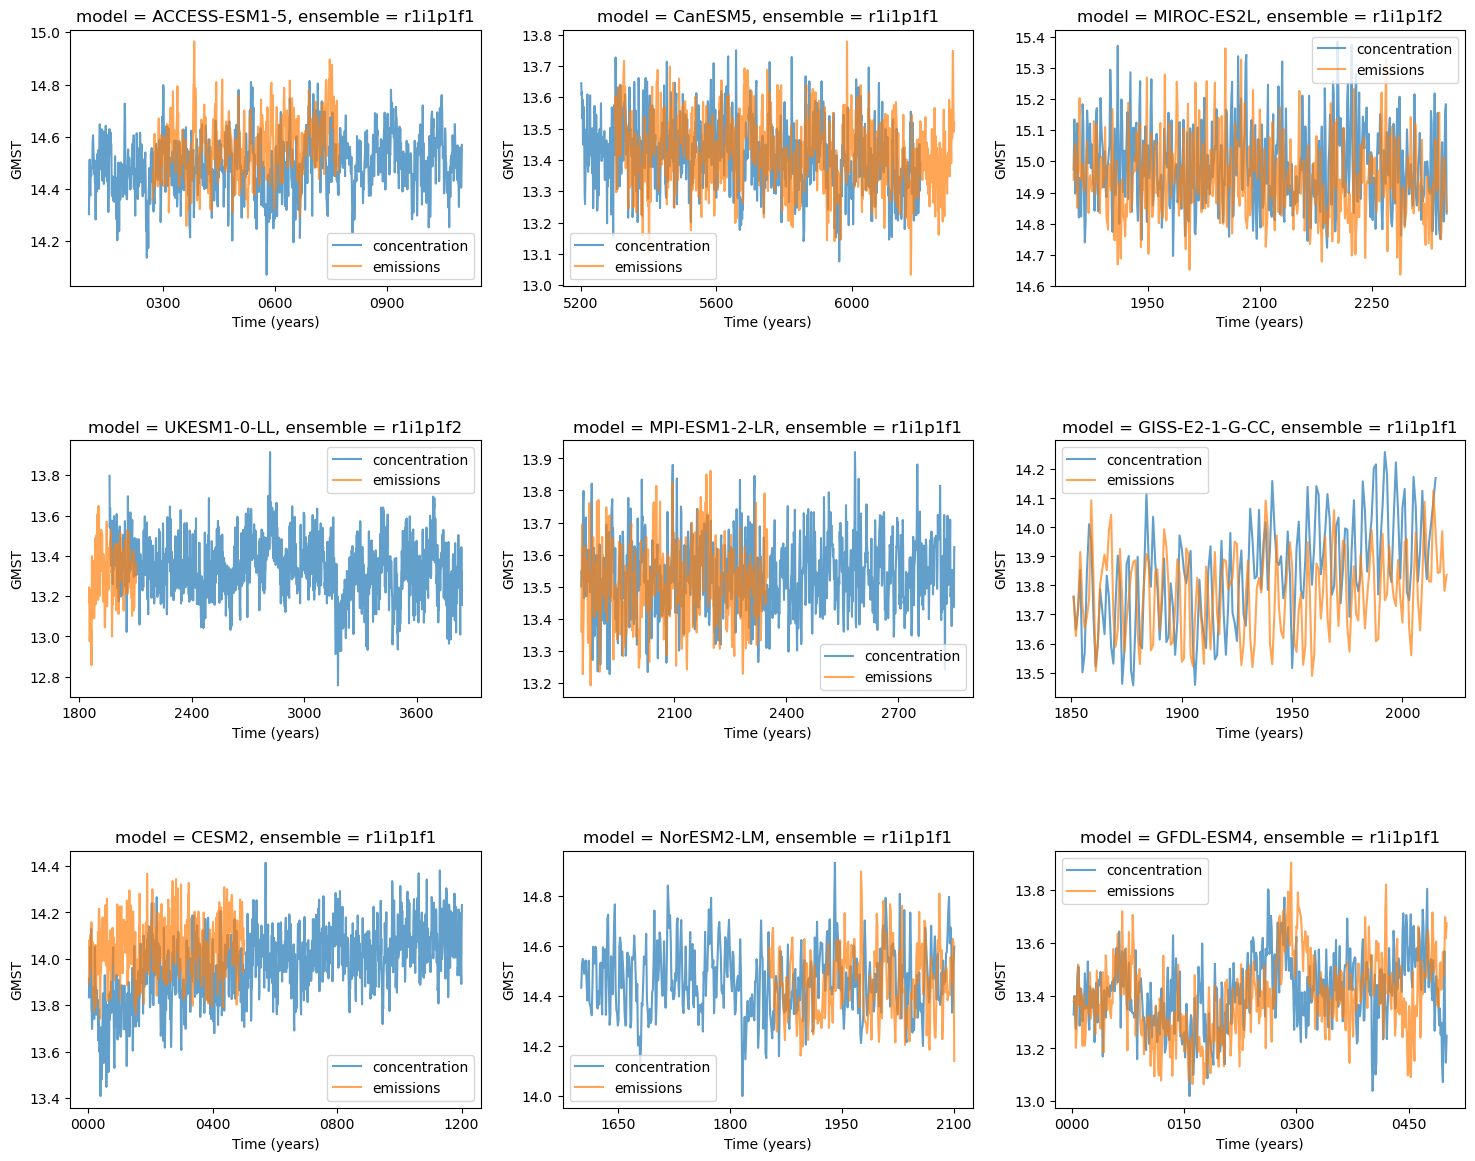

In [104]:
fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(nrows=3, ncols=3, hspace=0.6)


for num, (key, ds1) in enumerate(pi_smean_xrlist):
    ax = fig.add_subplot(gs[num])

    ds2 = esmpi_smean_xrlist[key]
    
    ds1 = ds1.isel(ensemble=0)
    ds2 = ds2.isel(ensemble=0)
    
    assert ds1.ensemble.values == ds2.ensemble.values
    
    
    ds1.plot(ax=ax, alpha=0.7, label=f'concentration')
    ds2.plot(ax=ax, alpha=0.7, label=f'emissions')
    

    ax.legend()
    
    ax.set_ylabel('GMST')
    ax.set_xlabel('Time (years)')

In [57]:
pi_smean_xrlist

key_dim = model


Number of da/ds: 8
---------------
['CanESM5']     ({'ensemble': 2, 'model': 1, 'time': 1400})
['MIROC-ES2L']  ({'ensemble': 1, 'model': 1, 'time': 500})
['UKESM1-0-LL'] ({'ensemble': 1, 'model': 1, 'time': 1880})
['MPI-ESM1-2-LR']({'ensemble': 2, 'model': 1, 'time': 1000})
['GISS-E2-1-G-CC']({'ensemble': 1, 'model': 1, 'time': 165})
['CESM2']       ({'ensemble': 1, 'model': 1, 'time': 1200})
['NorESM2-LM']  ({'ensemble': 1, 'model': 1, 'time': 501})
['GFDL-ESM4']   ({'ensemble': 1, 'model': 1, 'time': 500})

Text(0.5, 0, 'Time (years)')

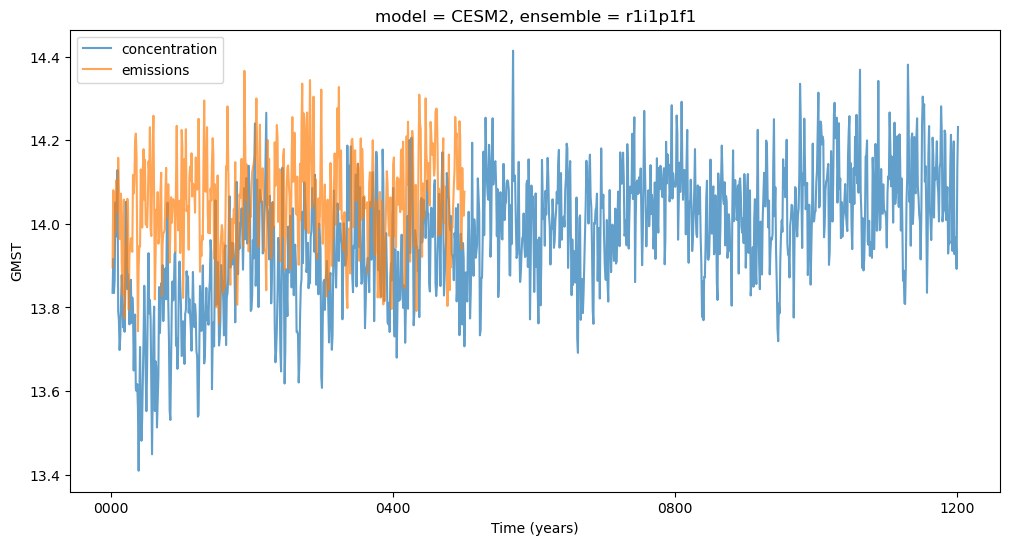

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

model = 'CESM2'

ds1 = pi_smean_xrlist[model].isel(ensemble=0)
ds2 = esmpi_smean_xrlist[model].isel(ensemble=0)

# ds1 = ds1.where(ds1.time.isin(ds2.time.values), drop=True)
# ds2 = ds2.where(ds2.time.isin(ds1.time.values), drop=True)

ds1.plot(alpha=0.7, label='concentration')
ds2.plot(alpha=0.7, label='emissions')

ax.legend()

ax.set_ylabel('GMST')
ax.set_xlabel('Time (years)')